# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('DATA FILE 334 (2).xlsx')
df.columns

Index([             'Part ID',    'Planning Leadtime',         'Order Policy',
                'Order Point',     'Safety Stock Qty',      'Fixed Order Qty',
             'Days Of Supply',    'Minimum Order Qty',    'Maximum Order Qty',
         'Multiple Order Qty',                  'Fab',                  'Pur',
                    'Stocked',          'Detail Only',              'Purc Lt',
                   'Abc Code',     'Inventory Locked',           'Inventory$',
         'Unit Material Cost',     'Annual Usage Qty',        'Prev Yr Usage',
             'Roll Ann Usage',          'Qty On Hand',    'Qty Available Mrp',
                   'TotAlloc',           'Coeff_Code',             'Stock Um',
           'Def Orig Country',       'Primary Whs Id',       'Primary Loc Id',
         'Annual Usage Value',       2666342.46838269,             'Profit %',
       'Cummulatove Profit %',           'Jan (2018)',           'Feb (2018)',
                 'Mar (2018)',           'Apr (2018)

In [3]:
start_index_2018 = df.columns.get_loc("Jan (2018)")
end_index_2018 = df.columns.get_loc("Dec (2018)")
start_index_2019 = df.columns.get_loc("Jan (2019)")
end_index_2019 = df.columns.get_loc("Dec (2019)")

Average monthly demand for 2018

In [4]:
demand_2018 = df.iloc[:, start_index_2018:end_index_2018+1].mean(axis=0).values
demand_2018

array([50.03671875, 48.42405063, 28.76298701, 57.31210191, 40.6557377 ,
       46.51639344, 40.30239617, 45.10610526, 59.62758621, 70.70143885,
       37.13111111, 36.66759398])

Fitting the Linear Regression model

In [5]:
months_2018 = np.arange(1, 13).reshape(-1, 1)  # Reshape for compatibility with LinearRegression model
model = LinearRegression()
model.fit(months_2018.reshape(-1, 1), demand_2018)

LinearRegression()

In [6]:
# Output the fitted model's slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

slope, intercept

(0.22233168398074937, 45.32519580707933)

In [7]:
months_2019 = np.arange(13, 25).reshape(-1, 1)  # From January (13) to December (24) of 2019

# Predict demand for 2019
predictions_2019 = model.predict(months_2019)
actual_demand_2019 = df.iloc[:, start_index_2019:end_index_2019+1].mean(axis=0).values

In [8]:
forecast_errors = actual_demand_2019 - predictions_2019
mad = np.mean(np.abs(forecast_errors))
mse = mean_squared_error(actual_demand_2019, predictions_2019)
mape = np.mean(np.abs(forecast_errors / actual_demand_2019)) * 100
mad, mse, mape


(8.320255504780368, 133.5670206150564, 13.968306123313448)

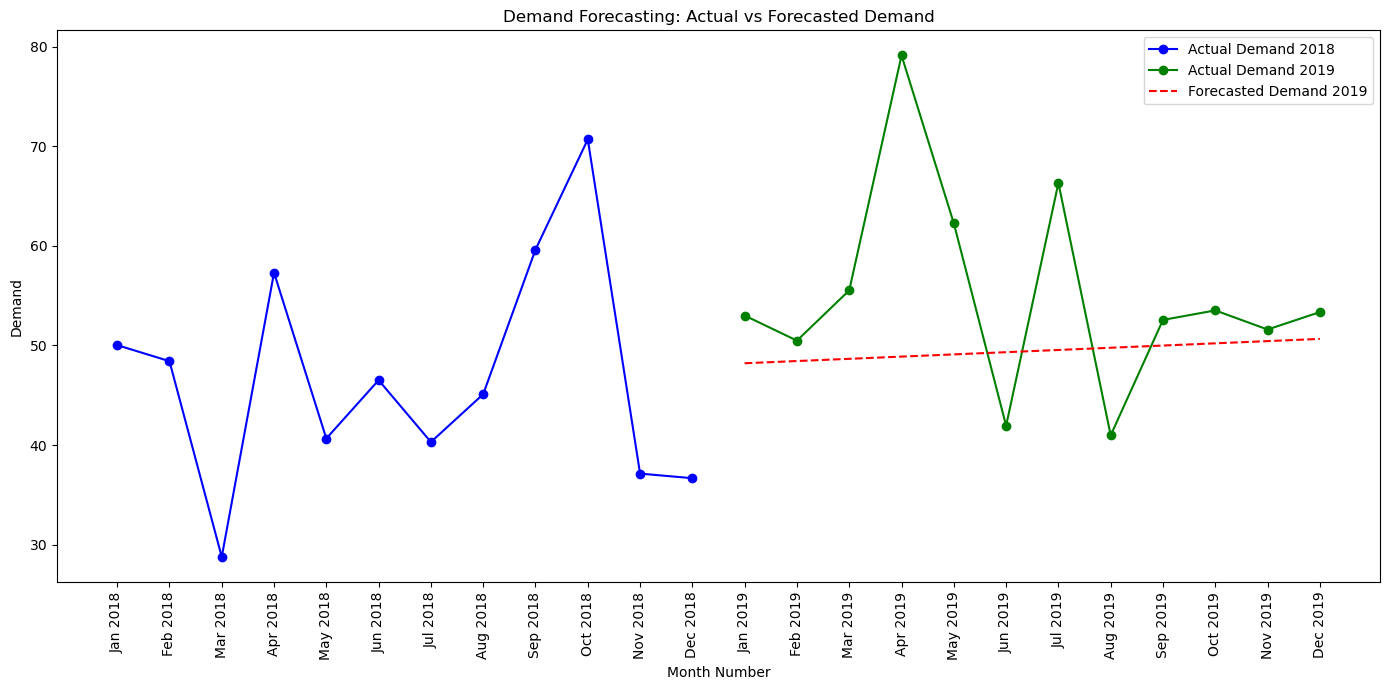

In [9]:
months_combined = np.arange(1, 25)
demand_combined = np.concatenate([demand_2018, actual_demand_2019])
plt.figure(figsize=(14, 7))
plt.plot(months_combined[:12], demand_2018, label='Actual Demand 2018', marker='o', color='blue')
plt.plot(months_combined[12:], actual_demand_2019, label='Actual Demand 2019', marker='o', color='green')
plt.plot(months_combined[12:], predictions_2019, label='Forecasted Demand 2019', linestyle='--', color='red')

plt.title('Demand Forecasting: Actual vs Forecasted Demand')
plt.xlabel('Month Number')
plt.ylabel('Demand')
plt.xticks(months_combined, 
           ['Jan 2018', 'Feb 2018', 'Mar 2018', 'Apr 2018', 'May 2018', 'Jun 2018', 
            'Jul 2018', 'Aug 2018', 'Sep 2018', 'Oct 2018', 'Nov 2018', 'Dec 2018', 
            'Jan 2019', 'Feb 2019', 'Mar 2019', 'Apr 2019', 'May 2019', 'Jun 2019', 
            'Jul 2019', 'Aug 2019', 'Sep 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

## On a Product Level

In [11]:
# demand_data = pd.to_numeric(row[32:56], errors='coerce').fillna(method='ffill').dropna()

#### Repeaters (First 10 Products)

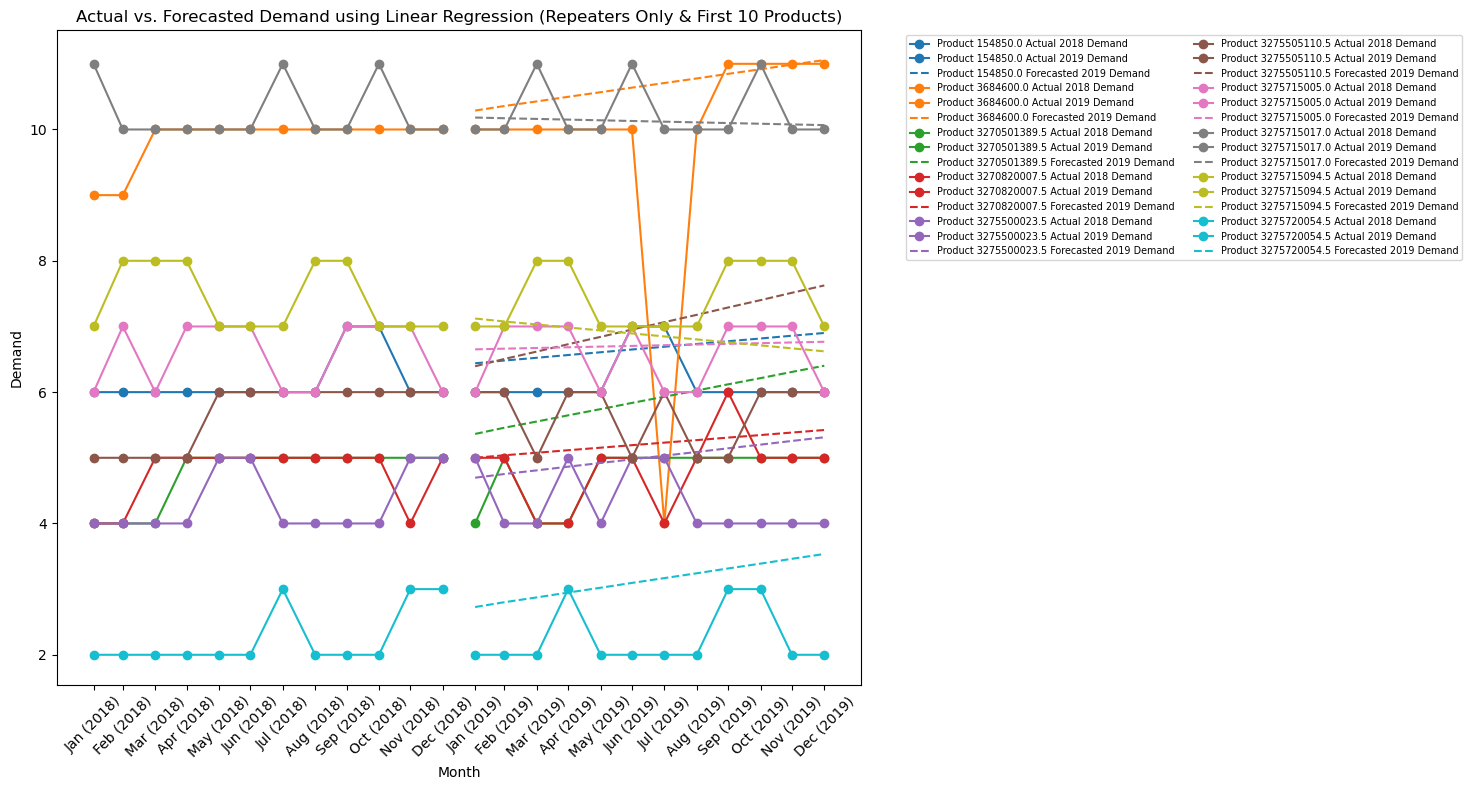

Average MAD for first 10 products: 0.7456682206682206
Average MSE for first 10 products: 1.114934308116126
Average MAPE for first 10 products: 16.714463146281325


In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

df_repeaters = df[df['Coeff_Code'] == 'Repeater'].set_index('Part ID').drop(columns=['Coeff_Code'])

# Define the date range for the x-axis labels
date_range = pd.date_range(start="2018-01-01", end="2019-12-31", freq='M')

# Prepare colormap for different products
cm = plt.get_cmap('tab10')  # Colormap with 10 distinct colors

# Initialize a figure for plotting
plt.figure(figsize=(15, 8))

# Initialize lists to store metrics
mad_list, mse_list, mape_list = [], [], []

# Counter for processed products
num_products_processed = 0

# Prepare a list of colors for the distinct products
colors = plt.cm.tab10(np.linspace(0, 1, 10)) 

for idx, (product_id, row) in enumerate(df_repeaters.iterrows()):
    demand_data = pd.to_numeric(row[32:56], errors='coerce').fillna(method='ffill').dropna()
    
    if len(demand_data) == 24:  # Check for complete data for both years
        train_data, test_data = demand_data[:12], demand_data[12:]
        train_months = np.arange(1, 13).reshape(-1, 1)  # 2018
        test_months = np.arange(13, 25).reshape(-1, 1)  # 2019

        # Fit Linear Regression model on 2018 data
        model = LinearRegression()
        model.fit(train_months, train_data)

        # Forecast for 2019
        predictions = model.predict(test_months)

        # Calculate accuracy metrics
        mad = mean_absolute_error(test_data, predictions)
        mse = mean_squared_error(test_data, predictions)
        mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100

        # Store metrics
        mad_list.append(mad)
        mse_list.append(mse)
        mape_list.append(mape)

        # Select color for the product
        color = colors[idx % 10]

        # Plot actual demand with unique color
        plt.plot(date_range[:12], demand_data[:12], marker='o', color=color, label=f'Product {product_id} Actual 2018 Demand')

        # Plot the actual 2019 demand
        plt.plot(date_range[12:], test_data, marker='o', color=color, label=f'Product {product_id} Actual 2019 Demand')

        # Overlay forecasted demand for 2019 with red dashed line
        plt.plot(date_range[12:], predictions, linestyle='--', color=color, label=f'Product {product_id} Forecasted 2019 Demand')

        # Increment the product counter
        num_products_processed += 1

    # Stop after plotting 10 products
    if num_products_processed >= 10:
        break

# Adjusting the x-axis to display full date range with formatted labels
plt.xticks(date_range, [date.strftime('%b (%Y)') for date in date_range], rotation=45)
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Actual vs. Forecasted Demand using Linear Regression (Repeaters Only & First 10 Products)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='x-small', ncol=2)
plt.tight_layout()
plt.show()

# Calculate and display average metrics
average_mad = np.mean(mad_list)
average_mse = np.mean(mse_list)
average_mape = np.mean(mape_list)

print(f'Average MAD for first 10 products: {average_mad}')
print(f'Average MSE for first 10 products: {average_mse}')
print(f'Average MAPE for first 10 products: {average_mape}')



#### Runners (First 10 Products)

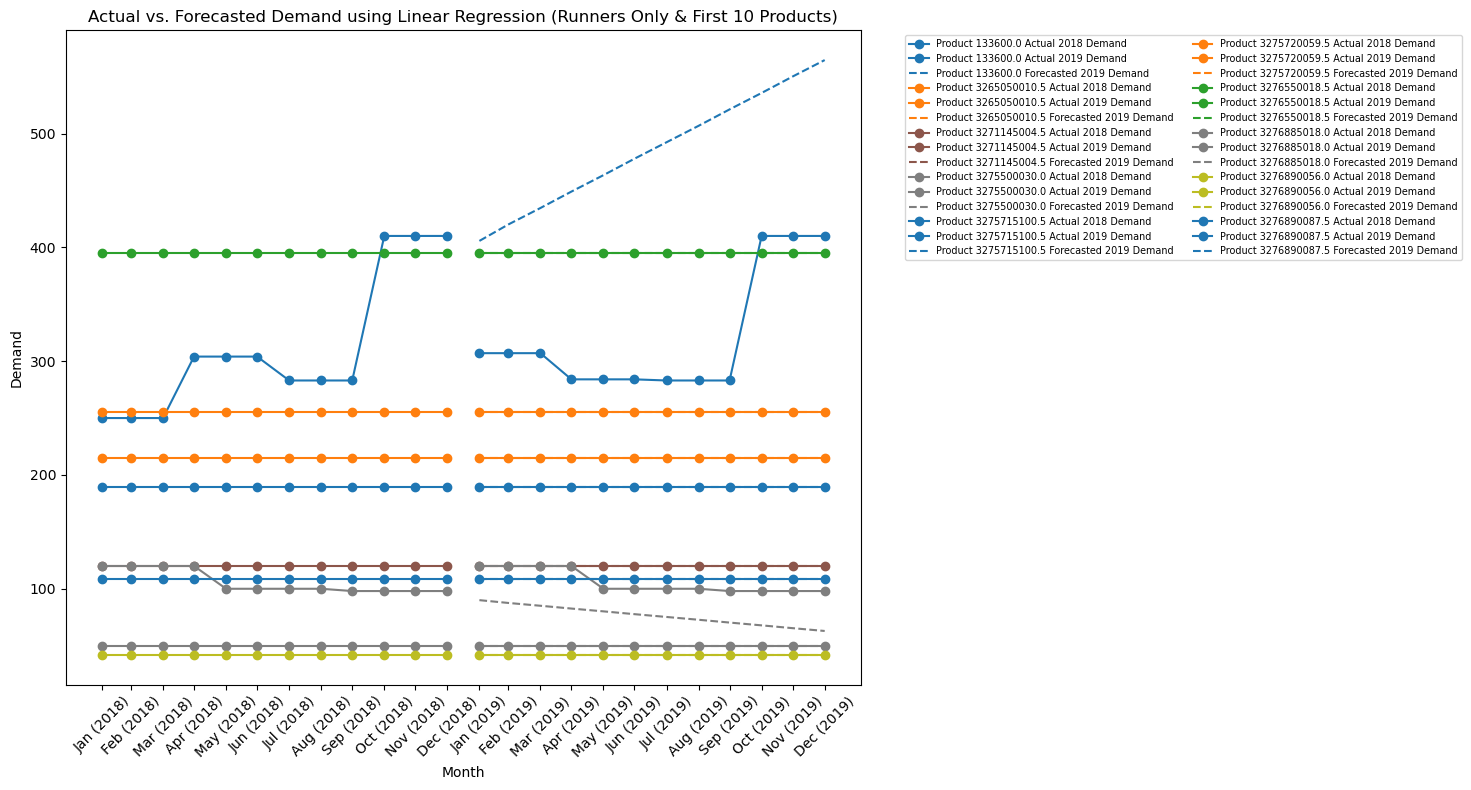

Average MAD for first 10 products: 19.36171328671328
Average MSE for first 10 products: 2970.2898839796553
Average MAPE for first 10 products: 8.118874578260955


In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

df_runners = df[df['Coeff_Code'] == 'Runner'].set_index('Part ID').drop(columns=['Coeff_Code'])

# Define the date range for the x-axis labels
date_range = pd.date_range(start="2018-01-01", end="2019-12-31", freq='M')

# Prepare colormap for different products
cm = plt.get_cmap('tab10')  # Colormap with 10 distinct colors

# Initialize a figure for plotting
plt.figure(figsize=(15, 8))

# Initialize lists to store metrics
mad_list, mse_list, mape_list = [], [], []

# Counter for processed products
num_products_processed = 0

# Prepare a list of colors for the distinct products
colors = plt.cm.tab10(np.linspace(0, 1, 10)) 

# Plot each product's actual demand and forecast, except for product 3271255000
for idx, (product_id, row) in enumerate(df_runners.iterrows()):
    demand_data = pd.to_numeric(row[32:56], errors='coerce').fillna(method='ffill').dropna()
    # Skip product 3271255000
    if product_id == 3271255000.5:
        continue
    
    if len(demand_data) == 24:  # Check for complete data for both years
        train_data, test_data = demand_data[:12], demand_data[12:]
        train_months = np.arange(1, 13).reshape(-1, 1)  # 2018
        test_months = np.arange(13, 25).reshape(-1, 1)  # 2019

        # Fit Linear Regression model on 2018 data
        model = LinearRegression()
        model.fit(train_months, train_data)

        # Forecast for 2019
        predictions = model.predict(test_months)

        # Calculate accuracy metrics
        mad = mean_absolute_error(test_data, predictions)
        mse = mean_squared_error(test_data, predictions)
        mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100

        # Store metrics
        mad_list.append(mad)
        mse_list.append(mse)
        mape_list.append(mape)

        # Select color for the product
        color = colors[idx % 10]

        # Plot actual demand with unique color
        plt.plot(date_range[:12], demand_data[:12], marker='o', color=color, label=f'Product {product_id} Actual 2018 Demand')

        # Plot the actual 2019 demand
        plt.plot(date_range[12:], test_data, marker='o', color=color, label=f'Product {product_id} Actual 2019 Demand')

        # Overlay forecasted demand for 2019 with red dashed line
        plt.plot(date_range[12:], predictions, linestyle='--', color=color, label=f'Product {product_id} Forecasted 2019 Demand')

        # Increment the product counter
        num_products_processed += 1

    # Stop after plotting 10 products
    if num_products_processed >= 10:
        break

# Adjusting the x-axis to display full date range with formatted labels
plt.xticks(date_range, [date.strftime('%b (%Y)') for date in date_range], rotation=45)
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Actual vs. Forecasted Demand using Linear Regression (Runners Only & First 10 Products)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='x-small', ncol=2)
plt.tight_layout()
plt.show()

# Calculate and display average metrics
average_mad = np.mean(mad_list)
average_mse = np.mean(mse_list)
average_mape = np.mean(mape_list)

print(f'Average MAD for first 10 products: {average_mad}')
print(f'Average MSE for first 10 products: {average_mse}')
print(f'Average MAPE for first 10 products: {average_mape}')

#### Strangers (First 10 Products)

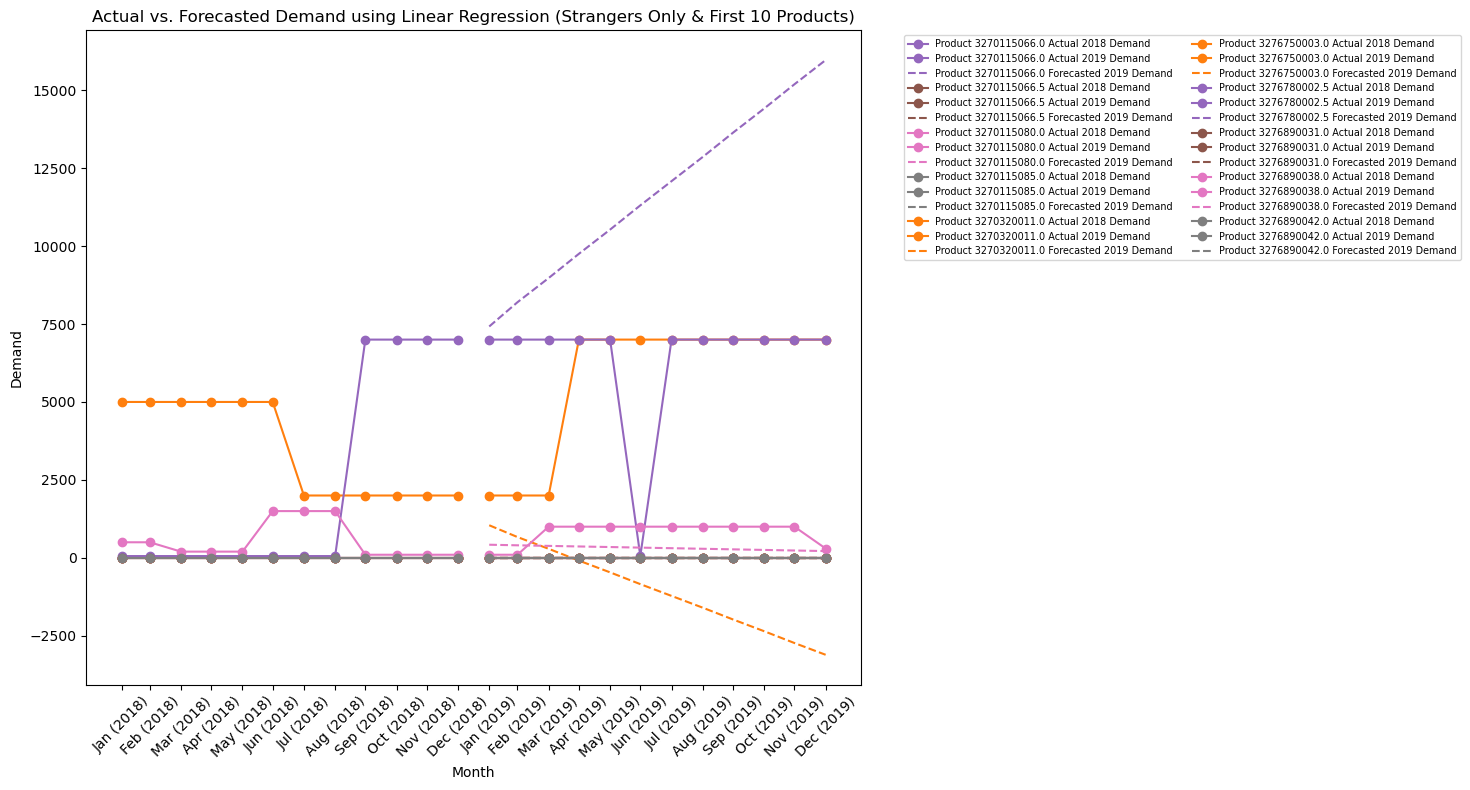

Average MAD for first 10 products: 1262.9055555555549
Average MSE for first 10 products: 9520611.02274873
Average MAPE for first 10 products: nan


In [42]:
df_spikers = df[df['Coeff_Code'].isin(['Spiker', 'Stranger'])].set_index('Part ID').drop(columns=['Coeff_Code'])

# Define the date range for the x-axis labels
date_range = pd.date_range(start="2018-01-01", end="2019-12-31", freq='M')

# Prepare colormap for different products
cm = plt.get_cmap('tab10')  # Colormap with 10 distinct colors

# Initialize a figure for plotting
plt.figure(figsize=(15, 8))

# Initialize lists to store metrics
mad_list, mse_list, mape_list = [], [], []

# Counter for processed products
num_products_processed = 0

# Prepare a list of colors for the distinct products
colors = plt.cm.tab10(np.linspace(0, 1, 10)) 

# Plot each product's actual demand and forecast, except for product 3271255000
for idx, (product_id, row) in enumerate(df_spikers.iterrows()):
    demand_data = pd.to_numeric(row[32:56], errors='coerce').fillna(method='ffill').dropna()

    if len(demand_data) == 24:  # Check for complete data for both years
        train_data, test_data = demand_data[:12], demand_data[12:]
        train_months = np.arange(1, 13).reshape(-1, 1)  # 2018
        test_months = np.arange(13, 25).reshape(-1, 1)  # 2019

        # Fit Linear Regression model on 2018 data
        model = LinearRegression()
        model.fit(train_months, train_data)

        # Forecast for 2019
        predictions = model.predict(test_months)

        # Calculate accuracy metrics
        mad = mean_absolute_error(test_data, predictions)
        mse = mean_squared_error(test_data, predictions)
        mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100

        # Store metrics
        mad_list.append(mad)
        mse_list.append(mse)
        mape_list.append(mape)

        # Select color for the product
        color = colors[idx % 10]

        # Plot actual demand with unique color
        plt.plot(date_range[:12], demand_data[:12], marker='o', color=color, label=f'Product {product_id} Actual 2018 Demand')

        # Plot the actual 2019 demand
        plt.plot(date_range[12:], test_data, marker='o', color=color, label=f'Product {product_id} Actual 2019 Demand')

        # Overlay forecasted demand for 2019 with red dashed line
        plt.plot(date_range[12:], predictions, linestyle='--', color=color, label=f'Product {product_id} Forecasted 2019 Demand')

        # Increment the product counter
        num_products_processed += 1

    # Stop after plotting 10 products
    if num_products_processed >= 10:
        break

# Adjusting the x-axis to display full date range with formatted labels
plt.xticks(date_range, [date.strftime('%b (%Y)') for date in date_range], rotation=45)
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Actual vs. Forecasted Demand using Linear Regression (Strangers Only & First 10 Products)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='x-small', ncol=2)
plt.tight_layout()
plt.show()

# Calculate and display average metrics
average_mad = np.mean(mad_list)
average_mse = np.mean(mse_list)
average_mape = np.mean(mape_list)

print(f'Average MAD for first 10 products: {average_mad}')
print(f'Average MSE for first 10 products: {average_mse}')
print(f'Average MAPE for first 10 products: {average_mape}')



## Error over all Items in Category

### Repeaters

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

df_repeaters = df[df['Coeff_Code'] == 'Repeater'].set_index('Part ID').drop(columns=['Coeff_Code'])

cm = plt.get_cmap('tab10')  # Colormap with 10 distinct colors

# Initialize lists to store metrics
mad_list, mse_list, mape_list = [], [], []

# Counter for processed products
num_products_processed = 0

# Plot each product's actual demand and forecast, except for product 3271255000
for idx, (product_id, row) in enumerate(df_repeaters.iterrows()):
    demand_data = pd.to_numeric(row[32:56], errors='coerce').fillna(method='ffill').dropna()
    if len(demand_data) == 24:  # Check for complete data for both years
        train_data, test_data = demand_data[:12], demand_data[12:]
        train_months = np.arange(1, 13).reshape(-1, 1)  # 2018
        test_months = np.arange(13, 25).reshape(-1, 1)  # 2019
        
        model = LinearRegression()
        model.fit(train_months, train_data)
        predictions = model.predict(test_months)

        mad = mean_absolute_error(test_data, predictions)
        mse = mean_squared_error(test_data, predictions)
        mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
        mad_list.append(mad)
        mse_list.append(mse)
        mape_list.append(mape)

        num_products_processed += 1


average_mad = np.mean(mad_list)
average_mse = np.mean(mse_list)
average_mape = np.mean(mape_list)
print(f'{num_products_processed} products processed')
print(f'Average MAD for all Repeaters: {average_mad}')
print(f'Average MSE for all Repeaters: {average_mse}')
print(f'Average MAPE for all Repeaters: {average_mape}')

73 products processed
Average MAD for all Repeaters: 0.46451873849134107
Average MSE for all Repeaters: 0.4766753786176143
Average MAPE for all Repeaters: 11.51724725277029


### Runners

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

df_runners = df[df['Coeff_Code'] == 'Runner'].set_index('Part ID').drop(columns=['Coeff_Code'])

cm = plt.get_cmap('tab10')  # Colormap with 10 distinct colors

# Initialize lists to store metrics
mad_list, mse_list, mape_list = [], [], []

# Counter for processed products
num_products_processed = 0

# Plot each product's actual demand and forecast, except for product 3271255000
for idx, (product_id, row) in enumerate(df_runners.iterrows()):
    demand_data = pd.to_numeric(row[32:56], errors='coerce').fillna(method='ffill').dropna()
    if len(demand_data) == 24:  # Check for complete data for both years
        train_data, test_data = demand_data[:12], demand_data[12:]
        train_months = np.arange(1, 13).reshape(-1, 1)  # 2018
        test_months = np.arange(13, 25).reshape(-1, 1)  # 2019
        
        model = LinearRegression()
        model.fit(train_months, train_data)
        predictions = model.predict(test_months)

        mad = mean_absolute_error(test_data, predictions)
        mse = mean_squared_error(test_data, predictions)
        mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
        mad_list.append(mad)
        mse_list.append(mse)
        mape_list.append(mape)

        num_products_processed += 1


average_mad = np.mean(mad_list)
average_mse = np.mean(mse_list)
average_mape = np.mean(mape_list)
print(f'{num_products_processed} products processed')
print(f'Average MAD for all Runners: {average_mad}')
print(f'Average MSE for all Runners: {average_mse}')
print(f'Average MAPE for all Runners: {average_mape}')

21 products processed
Average MAD for all Runners: 11.623755873755917
Average MSE for all Runners: 1456.2943968101304
Average MAPE for all Runners: 11.869039126301365


### Strangers

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

df_spikers = df[df['Coeff_Code'].isin(['Spiker', 'Stranger'])].set_index('Part ID').drop(columns=['Coeff_Code'])

cm = plt.get_cmap('tab10')  # Colormap with 10 distinct colors

# Initialize lists to store metrics
mad_list, mse_list, mape_list = [], [], []

# Counter for processed products
num_products_processed = 0

# Plot each product's actual demand and forecast, except for product 3271255000
for idx, (product_id, row) in enumerate(df_spikers.iterrows()):
    demand_data = pd.to_numeric(row[32:56], errors='coerce').fillna(method='ffill').dropna()
    if len(demand_data) == 24:  # Check for complete data for both years
        train_data, test_data = demand_data[:12], demand_data[12:]
        train_months = np.arange(1, 13).reshape(-1, 1)  # 2018
        test_months = np.arange(13, 25).reshape(-1, 1)  # 2019
        
        model = LinearRegression()
        model.fit(train_months, train_data)
        predictions = model.predict(test_months)

        mad = mean_absolute_error(test_data, predictions)
        mse = mean_squared_error(test_data, predictions)
        mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
        mad_list.append(mad)
        mse_list.append(mse)
        mape_list.append(mape)

        num_products_processed += 1


average_mad = np.mean(mad_list)
average_mse = np.mean(mse_list)
average_mape = np.mean(mape_list)
print(f'{num_products_processed} products processed')
print(f'Average MAD for all Spikers: {average_mad}')
print(f'Average MSE for all Spikers: {average_mse}')
print(f'Average MAPE for all Spikers: {average_mape}')

226 products processed
Average MAD for all Spikers: 63.44592173436197
Average MSE for all Spikers: 422910.40579817595
Average MAPE for all Spikers: nan


### All Products

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


cm = plt.get_cmap('tab10')  # Colormap with 10 distinct colors

# Initialize lists to store metrics
mad_list, mse_list, mape_list = [], [], []

# Counter for processed products
num_products_processed = 0

# Plot each product's actual demand and forecast, except for product 3271255000
for idx, (product_id, row) in enumerate(df.iterrows()):
    demand_data = pd.to_numeric(row[32:56], errors='coerce').fillna(method='ffill').dropna()
    if len(demand_data) == 24:  # Check for complete data for both years
        train_data, test_data = demand_data[:12], demand_data[12:]
        train_months = np.arange(1, 13).reshape(-1, 1)  # 2018
        test_months = np.arange(13, 25).reshape(-1, 1)  # 2019
        
        model = LinearRegression()
        model.fit(train_months, train_data)
        predictions = model.predict(test_months)

        mad = mean_absolute_error(test_data, predictions)
        mse = mean_squared_error(test_data, predictions)
        mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
        mad_list.append(mad)
        mse_list.append(mse)
        mape_list.append(mape)

        num_products_processed += 1


average_mad = np.mean(mad_list)
average_mse = np.mean(mse_list)
average_mape = np.mean(mape_list)
print(f'{num_products_processed} products processed')
print(f'Average MAD for all Products: {average_mad}')
print(f'Average MSE for all Products: {average_mse}')
print(f'Average MAPE for all Products: {average_mape}')

689 products processed
Average MAD for all Products: 53.23903939303812
Average MSE for all Products: 103402.97124568753
Average MAPE for all Products: inf
